# Transfer Leaning

> We will be using the food-101 dataset from kaggle. It has 101 food labels.


**Dataset(Link)** -> https://www.kaggle.com/datasets/dansbecker/food-101


In [ ]:
!nvidia-smi

Tue Jul 26 05:54:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref=zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

--2022-07-26 05:54:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   270MB/s    in 0.6s    

2022-07-26 05:54:18 (270 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os

# Find the number of files

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories, {len(filenames)} images in '{dirpath}'. ")

There are 2 directories, 0 images in '10_food_classes_10_percent'. 
There are 10 directories, 0 images in '10_food_classes_10_percent/train'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/chicken_curry'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/grilled_salmon'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/sushi'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/pizza'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/steak'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/fried_rice'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/chicken_wings'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/ice_cream'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/ramen'. 
There are 0 directories, 75 images in '10_food_classes_10_percent/train/hamburger'. 
There are

## Visualizing the images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline
import random

def view_random_image(target_dir,target_class):

  """
    target_dir and target_class are in string format.
  """

  # Target directory to view images
  target_folder= target_dir + target_class

  # Random Image path
  random_image= random.sample(os.listdir(target_folder),1)

  # print(random_image)

  # Plotting and reading the images
  img= mping.imread(target_folder + "/"  + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  # print(f"Image shape: {img.shape}") # Shape of the image

  return img



array([[[  0,  11,   5],
        [  1,  12,   6],
        [  1,  12,   6],
        ...,
        [ 14,   8,   0],
        [ 14,  11,   4],
        [ 15,  12,   5]],

       [[  1,  12,   6],
        [  1,  12,   6],
        [  2,  13,   7],
        ...,
        [ 17,  11,   0],
        [ 12,   9,   2],
        [ 12,   9,   2]],

       [[  0,  13,   6],
        [  1,  14,   7],
        [  2,  15,   8],
        ...,
        [ 20,  14,   0],
        [ 14,   9,   3],
        [ 14,   9,   3]],

       ...,

       [[160, 128,  77],
        [159, 127,  76],
        [174, 142,  91],
        ...,
        [ 97,  70,  15],
        [108,  79,  23],
        [108,  79,  23]],

       [[168, 136,  85],
        [148, 116,  65],
        [177, 145,  94],
        ...,
        [115,  88,  33],
        [109,  85,  25],
        [108,  84,  24]],

       [[170, 138,  87],
        [182, 150,  99],
        [175, 143,  92],
        ...,
        [ 99,  74,  18],
        [ 90,  68,   8],
        [ 90,  68,   8]]

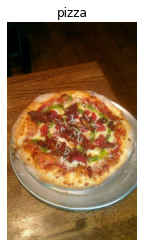

In [ ]:
view_random_image('/content/10_food_classes_10_percent/train/', target_class='pizza')

## Creating the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SHAPE=(224,224)
BATCH_SIZE=32

train_dir='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'


train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)


train_data= train_datagen.flow_from_directory(train_dir, target_size=IMG_SHAPE, batch_size=BATCH_SIZE, class_mode="categorical")

test_data= test_datagen.flow_from_directory(test_dir, target_size=IMG_SHAPE, batch_size=BATCH_SIZE, class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Setting up callbacks

> There are the things that are running while the model is training on the training datasets.

> There are extra functionality that we can add to the models to be performed during or after training.

Examples:

* Tensorboard callback
* ModelCheckpoint callback
* EarlyStopping callback

### Tensorboard

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir= dir_name + "/" + experiment_name + "/" + datetime.datetime.utcnow().strftime("%Y%m%d")
  tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving Tensorboard log files to: {log_dir}")
  return tensorboard_callback

## Tensorflow Hub

**Link** -> https://tfhub.dev/

> Found model from tensorflow hub which we can use in our use case.

**Link For efficientnet/b0/feature-vector** -> https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

**Link for imagenet/resnet_v2_50/feature_vector** -> https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5

### Model URLS from tensorflow Hub

In [ ]:
efficientnet_url='https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
resnet_url= 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

### Dependencies needed

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

### Creating a model

In [ ]:
IMG_SHAPE

(224, 224)

In [ ]:
IMG_SHAPE+(3,)

(224, 224, 3)

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMG_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

## Trying the Imagenet/resnet model from Tensorflow Hub

In [ ]:
train_data.num_classes

10

In [ ]:
resnet_model=create_model(resnet_url, num_classes=train_data.num_classes)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


### Fitting the Resnet Model

> We are only using 10% of the data with only 10 labels.

In [ ]:
resnet_model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam())

tensorboardCallback= create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet_50_v2")

resnet_history=resnet_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data), callbacks=[tensorboardCallback] ,validation_data=test_data, validation_steps=len(test_data))

Saving Tensorboard log files to: tensorflow_hub/resnet_50_v2/20220726
Epoch 1/10
24/24 [==============================] - 31s 734ms/step - loss: 2.0119 - accuracy: 0.3240 - val_loss: 1.2405 - val_accuracy: 0.6136
Epoch 2/10
24/24 [==============================] - 15s 663ms/step - loss: 0.9254 - accuracy: 0.7267 - val_loss: 0.8272 - val_accuracy: 0.7320
Epoch 3/10
24/24 [==============================] - 15s 657ms/step - loss: 0.6207 - accuracy: 0.8267 - val_loss: 0.7529 - val_accuracy: 0.7536
Epoch 4/10
24/24 [==============================] - 16s 677ms/step - loss: 0.4992 - accuracy: 0.8573 - val_loss: 0.7092 - val_accuracy: 0.7644
Epoch 5/10
24/24 [==============================] - 15s 655ms/step - loss: 0.4047 - accuracy: 0.8973 - val_loss: 0.6846 - val_accuracy: 0.7752
Epoch 6/10
24/24 [==============================] - 15s 655ms/step - loss: 0.3164 - accuracy: 0.9387 - val_loss: 0.6443 - val_accuracy: 0.7844
Epoch 7/10
24/24 [==============================] - 15s 654ms/step - los

In [ ]:
resnet_model.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 0.6183 - accuracy: 0.7992


[0.6183200478553772, 0.7991999983787537]

### Conclusion

> The resnet model we choose from tensorflow hub has an accuracy of ~ 79% which is almost double the accuracy score we had when we build a CNN model(~42%) from scratch. This is the power of transfer learning. We only used 10% of the dataset from the dataset we had when we build a CNN model from scratch.

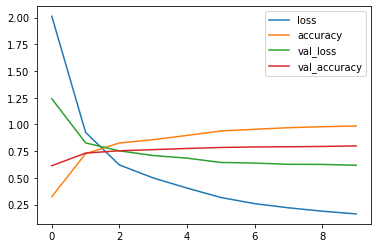

In [ ]:
import pandas as pd

pd.DataFrame(resnet_history.history).plot()

### Plot and Lost Curve

In [ ]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

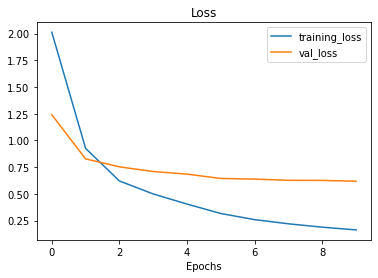

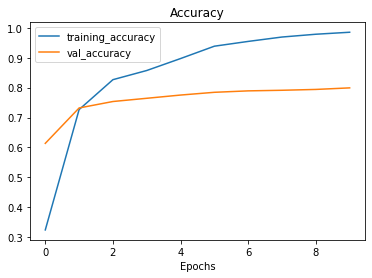

In [ ]:
plot_loss_curves(resnet_history)

## Trying the efficientnet_b0 model from Tensorflow Hub

**Resource** -> https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html

In [ ]:
effecientnet_model= create_model(efficientnet_url, num_classes=train_data.num_classes)

In [ ]:
effecientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
effecientnet_model.compile(metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy")

tensorboardCallback= create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="effecientnet_model_b0")

effecientnet_history=effecientnet_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data), callbacks=[tensorboardCallback] ,validation_data=test_data, validation_steps=len(test_data))

Saving Tensorboard log files to: tensorflow_hub/effecientnet_model_b0/20220726
Epoch 1/10
24/24 [==============================] - 25s 695ms/step - loss: 1.7866 - accuracy: 0.4773 - val_loss: 1.2291 - val_accuracy: 0.7516
Epoch 2/10
24/24 [==============================] - 15s 622ms/step - loss: 1.0231 - accuracy: 0.7827 - val_loss: 0.8332 - val_accuracy: 0.8340
Epoch 3/10
24/24 [==============================] - 15s 636ms/step - loss: 0.7380 - accuracy: 0.8413 - val_loss: 0.6768 - val_accuracy: 0.8528
Epoch 4/10
24/24 [==============================] - 15s 642ms/step - loss: 0.5918 - accuracy: 0.8787 - val_loss: 0.5952 - val_accuracy: 0.8616
Epoch 5/10
24/24 [==============================] - 15s 635ms/step - loss: 0.5003 - accuracy: 0.9093 - val_loss: 0.5453 - val_accuracy: 0.8668
Epoch 6/10
24/24 [==============================] - 15s 632ms/step - loss: 0.4341 - accuracy: 0.9133 - val_loss: 0.5082 - val_accuracy: 0.8724
Epoch 7/10
24/24 [==============================] - 15s 632ms/s

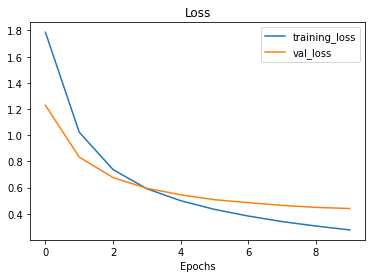

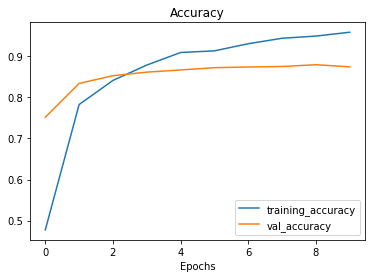

In [ ]:
plot_loss_curves(effecientnet_history)

In [ ]:
resnet_model.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 0.6183 - accuracy: 0.7992


[0.6183200478553772, 0.7991999983787537]

In [ ]:
effecientnet_model.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 0.4407 - accuracy: 0.8744


[0.44074058532714844, 0.8744000196456909]

## Conclusion

> The *effecientnet_model* has an higher accuracy of ~ 87.6% and the *resnet_model* had an accuracy of ~ 79.47% on the same training data, test data, and the number of epochs. 

## Trying a better/updated verion of efficientnet/b0 which is efficientnet/b7

> Above we tried the efficientnet/b0 and we got an insane accuracy score of **87.63%**. Let see that the updated model can beat that score or not as an experiment.

**Link(By Tensorflow Team)** -> https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1

**Link(By Google Team)** - https://tfhub.dev/google/efficientnet/b7/feature-vector/1

In [ ]:
efficientnet_b7_by_tensorflow_url='https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'
efficientnet_b7_by_google_url='https://tfhub.dev/google/efficientnet/b7/feature-vector/1'

In [ ]:
def updated_create_model(model_url, num_classes=10,):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMG_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  model.compile(metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy")

  return model

In [ ]:
efficientnet_b7_by_tensorflow_model =updated_create_model(efficientnet_b7_by_tensorflow_url, num_classes=train_data.num_classes)

In [ ]:
tensorboardCallback= create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnet_b7_by_tensorflow_team")
effecientnet_b7_by_tensorflow_history=efficientnet_b7_by_tensorflow_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data), callbacks=[tensorboardCallback] ,validation_data=test_data, validation_steps=len(test_data))

Saving Tensorboard log files to: tensorflow_hub/efficientnet_b7_by_tensorflow_team/20220726
Epoch 1/10
24/24 [==============================] - 39s 2s/step - loss: 0.2066 - accuracy: 0.9707 - val_loss: 0.4364 - val_accuracy: 0.8632
Epoch 2/10
24/24 [==============================] - 36s 2s/step - loss: 0.1851 - accuracy: 0.9813 - val_loss: 0.4274 - val_accuracy: 0.8684
Epoch 3/10
24/24 [==============================] - 35s 2s/step - loss: 0.1690 - accuracy: 0.9827 - val_loss: 0.4239 - val_accuracy: 0.8680
Epoch 4/10
24/24 [==============================] - 36s 2s/step - loss: 0.1547 - accuracy: 0.9867 - val_loss: 0.4218 - val_accuracy: 0.8668
Epoch 5/10
24/24 [==============================] - 35s 2s/step - loss: 0.1422 - accuracy: 0.9880 - val_loss: 0.4184 - val_accuracy: 0.8652
Epoch 6/10
24/24 [==============================] - 35s 2s/step - loss: 0.1305 - accuracy: 0.9880 - val_loss: 0.4197 - val_accuracy: 0.8648
Epoch 7/10
24/24 [==============================] - 36s 2s/step - lo

In [ ]:
efficientnet_b7_by_tensorflow_model.evaluate(test_data)

79/79 [==============================] - 27s 346ms/step - loss: 0.4126 - accuracy: 0.8636


[0.41255834698677063, 0.8636000156402588]

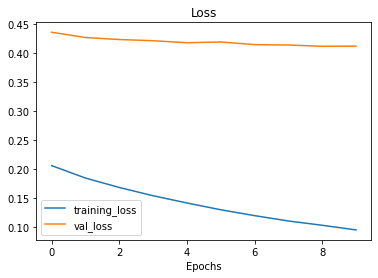

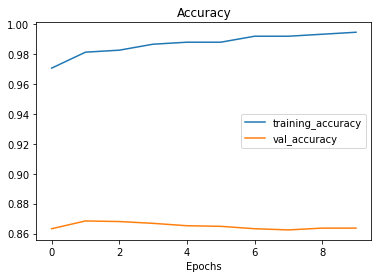

In [ ]:
plot_loss_curves(effecientnet_b7_by_tensorflow_history)

In [ ]:
efficientnet_b7_by_google_model =updated_create_model(efficientnet_b7_by_google_url, num_classes=train_data.num_classes)

In [ ]:
tensorboardCallback= create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnet_b7_by_google_team")
effecientnet_b7_by_google_history=efficientnet_b7_by_google_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data), callbacks=[tensorboardCallback] ,validation_data=test_data, validation_steps=len(test_data))

Saving Tensorboard log files to: tensorflow_hub/efficientnet_b7_by_google_team/20220726
Epoch 1/10
24/24 [==============================] - 49s 2s/step - loss: 1.5950 - accuracy: 0.5707 - val_loss: 0.9708 - val_accuracy: 0.8092
Epoch 2/10
24/24 [==============================] - 36s 2s/step - loss: 0.7906 - accuracy: 0.8227 - val_loss: 0.6773 - val_accuracy: 0.8344
Epoch 3/10
24/24 [==============================] - 35s 2s/step - loss: 0.5798 - accuracy: 0.8613 - val_loss: 0.5804 - val_accuracy: 0.8476
Epoch 4/10
24/24 [==============================] - 36s 2s/step - loss: 0.4743 - accuracy: 0.8853 - val_loss: 0.5277 - val_accuracy: 0.8540
Epoch 5/10
24/24 [==============================] - 35s 2s/step - loss: 0.4136 - accuracy: 0.9027 - val_loss: 0.5011 - val_accuracy: 0.8540
Epoch 6/10
24/24 [==============================] - 35s 2s/step - loss: 0.3547 - accuracy: 0.9253 - val_loss: 0.4784 - val_accuracy: 0.8592
Epoch 7/10
24/24 [==============================] - 35s 2s/step - loss: 

In [ ]:
efficientnet_b7_by_google_model.evaluate(test_data)

79/79 [==============================] - 28s 346ms/step - loss: 0.4359 - accuracy: 0.8664


[0.4359002411365509, 0.8664000034332275]

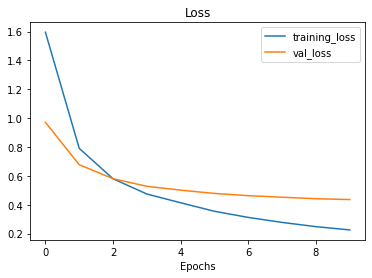

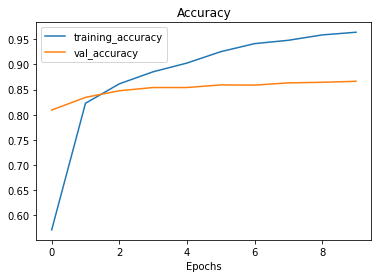

In [ ]:
plot_loss_curves(effecientnet_b7_by_google_history)

## Conclusion

> Even though **efficientnet_b7_model** is the newest model made by Tensorflow and the Google Dev Team separately in terms of models, both did ~ 86.84% and ~ 86.60% respectively which is ever so slightly less than the **efficientnet_b0_model** which did around ~ 87.6%.

## Types of Transfer Learning

> "As is" transfer learning is when you take a pretrained model as it is and apply it to your task without any changes.

    For example, many computer vision models are pretrained on the ImageNet dataset which contains 1000 different classes of images. This means passing a single image to this model will produce 1000 different prediction probability values (1 for each class).

    This is helpful if you have 1000 classes of image you'd like to classify and they're all the same as the ImageNet classes, however, it's not helpful if you want to classify only a small subset of classes (such as 10 different kinds of food). Model's with "/classification" in their name on TensorFlow Hub provide this kind of functionality.

> **Feature extraction transfer learning** is when you take the underlying patterns (also called weights) a pretrained model has learned and adjust its outputs to be more suited to your problem.

    For example, say the pretrained model you were using had 236 different layers (EfficientNetB0 has 236 layers), but the top layer outputs 1000 classes because it was pretrained on ImageNet. To adjust this to your own problem, you might remove the original activation layer and replace it with your own but with the right number of output classes. The important part here is that only the top few layers become trainable, the rest remain frozen.
    This way all the underlying patterns remain in the rest of the layers and you can utilise them for your own problem. This kind of transfer learning is very helpful when your data is similar to the data a model has been pretrained on.

> **Fine-tuning transfer learning** is when you take the underlying patterns (also called weights) of a pretrained model and adjust (fine-tune) them to your own problem.

## TensorBoard

**Link** -> https://www.tensorflow.org/tensorboard

> When we upload things to TensorBoard.dev, the experiments are public knowledge or visible to everyone. So if we're running some private experiments that we don't want others to see, then do not upload it to TensorBoard.dev

**Link** -> https://tensorboard.dev/

### Upload records to [TensorBoard Website](https://tensorboard.dev/) 

In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name "Effecientnet_b0 VS Effecientnet_b7_by_tensorflow VS Effecientnet_b7_by_google VS Resnet_50_V2" \
--description "Comparing four different models taken from TF hub using feature extraion process of transfer learning" \
--one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/sbVj1YdqTwWaO3yJQ64Djg/

[2022-07-26T06:26:36] Started scanning logdir.
W0726 06:26:38.424341 140592271026048 uploader.py:1095] Blob too large; skipping.  Size 13815848 exceeds limit of 10485760 bytes.
W0726 06:26:40.899024 140592271026048 uploader.py:1095] Blob too large; skipping.  Size 13815848 exceeds limit of 10485760 bytes.
[2022-07-26T06:26:42] Total uploaded: 294 scalars, 0 tensors, 3 binary objects (10.0 MB)
Total skipped: 2 binary objects (26.4 MB)
[2022-07-26T06:26:42] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/sbVj1YdqTwWaO3yJQ64Djg/


> Public Tensorboard 

**Link** -> https://tensorboard.dev/experiment/sbVj1YdqTwWaO3yJQ64Djg/#scalars

### Check the list of experiments 

In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/sbVj1YdqTwWaO3yJQ64Djg/
	Name                 Effecientnet_b0 VS Effecientnet_b7_by_tensorflow VS Effecientnet_b7_by_google VS Resnet_50_V2
	Description          Comparing four different models taken from TF hub using feature extraion process of transfer learning
	Id                   sbVj1YdqTwWaO3yJQ64Djg
	Created              2022-07-26 06:26:36 (9 minutes ago)
	Updated              2022-07-26 06:26:42 (9 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              294
	Tensor bytes         0
	Binary object bytes  10515518
https://tensorboard.dev/experiment/nSjdQgFdTDq84w1GrYVy2Q/
	Name                 Effecientnet_b0 VS Effecientnet_b7_by_tensorflow VS Effecientnet_b7_by_google VS Resnet_50_V2
	Description          Comparing four different models taken from TF hub using feature extraion process of transfer learning
	Id                   nSjdQgFdTDq84w1GrYVy2Q
	Created              2022-07-26 06:24:45 (11 minutes ago)
	Update

### To delete an experiment

In [ ]:
!tensorboard dev delete --experiment_id sbVj1YdqTwWaO3yJQ64Djg

Deleted experiment sbVj1YdqTwWaO3yJQ64Djg.


### To confirm deleted experiment

In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/nSjdQgFdTDq84w1GrYVy2Q/
	Name                 Effecientnet_b0 VS Effecientnet_b7_by_tensorflow VS Effecientnet_b7_by_google VS Resnet_50_V2
	Description          Comparing four different models taken from TF hub using feature extraion process of transfer learning
	Id                   nSjdQgFdTDq84w1GrYVy2Q
	Created              2022-07-26 06:24:45 (13 minutes ago)
	Updated              2022-07-26 06:24:52 (13 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              294
	Tensor bytes         0
	Binary object bytes  10515518
https://tensorboard.dev/experiment/la86QlWpSEC5AFmv0v4uOQ/
	Name                 Effecientnet_b0 VS Effecientnet_b7_by_tensorflow VS Effecientnet_b7_by_google VS Resnet_50_V2
	Description          Comparing four different models taken from TF hub using feature extraion process of transfer learning
	Id                   la86QlWpSEC5AFmv0v4uOQ
	Created              2022-07-26 06:24:14 (14 minutes ago)
	Upda

## Download the Tensorboard files created in colab

In [ ]:
!zip -r /content/file.zip /content/tensorflow_hub/

  adding: content/tensorflow_hub/ (stored 0%)
  adding: content/tensorflow_hub/efficientnet_b7_by_tensorflow_team/ (stored 0%)
  adding: content/tensorflow_hub/efficientnet_b7_by_tensorflow_team/20220726/ (stored 0%)
  adding: content/tensorflow_hub/efficientnet_b7_by_tensorflow_team/20220726/train/ (stored 0%)
  adding: content/tensorflow_hub/efficientnet_b7_by_tensorflow_team/20220726/train/events.out.tfevents.1658815724.647854429ddb.76.6.v2 (deflated 92%)
  adding: content/tensorflow_hub/efficientnet_b7_by_tensorflow_team/20220726/validation/ (stored 0%)
  adding: content/tensorflow_hub/efficientnet_b7_by_tensorflow_team/20220726/validation/events.out.tfevents.1658815736.647854429ddb.76.7.v2 (deflated 74%)
  adding: content/tensorflow_hub/resnet_50_v2/ (stored 0%)
  adding: content/tensorflow_hub/resnet_50_v2/20220726/ (stored 0%)
  adding: content/tensorflow_hub/resnet_50_v2/20220726/train/ (stored 0%)
  adding: content/tensorflow_hub/resnet_50_v2/20220726/train/events.out.tfevents

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>